In [12]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
import warnings

style.use('fivethirtyeight')
%matplotlib inline
warnings.filterwarnings('ignore')

title_font = {
    'fontsize': 16,
    'fontweight': 'bold',
    'color': 'gray',
    'family': 'serif',
}

In [113]:
df = pd.read_csv('BRAINSIZE.csv')
df

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRICount
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545
5,Female,99,90,110,146.0,69.0,928799
6,Female,138,136,131,138.0,64.5,991305
7,Female,92,90,98,175.0,66.0,854258
8,Male,89,93,84,134.0,66.3,904858
9,Male,133,114,147,172.0,68.8,955466


**Описание датасета**
* **Gender** - пол
* **FSIQ** - результат теста на комбинированный уровень интелекта по шкале WAIS-R
* **VIQ** - результат теста на вербальный уровень интелекта по шкале WAIS-R
* **PIQ** - результат теста на функциональный уровень интелекта по шкале WAIS-R
* **Weight** - вес
* **Height** - рост
* **MRICount** - объем головного мозга (измеряется количеством пикселей на изображении томографа)

In [210]:
df.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRICount
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


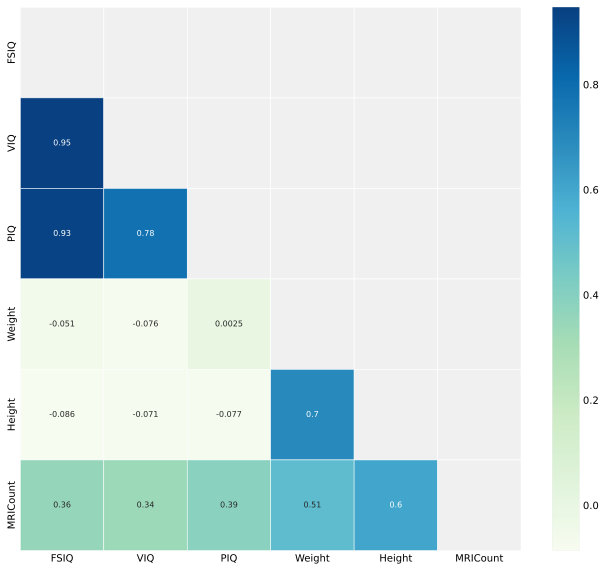

In [87]:
plt.figure(figsize = (10, 10))
mask = np.zeros_like(df.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), mask = mask, annot = True, linewidths = .5, annot_kws = {"size":8}, cmap='GnBu')
plt.show()

Между параметрами FSIQ, VIQ и PIQ наблюдается высокая корреляция, поэтому данные признаки взаимоисключают друг друга. Наибольшей корреляцией с параметром MRICount достигает параметр PIQ (по коэффициенту Пирсона). Поэтому для дальнейшего исследования будем использовать признак MRICount и целевую переменную PIQ.
Также проверим насколько изменится корреляция между признаками при гендерном разделении данных на мужчин и женщин

In [160]:
def plot(x, y, title = 'NA', b0 = 'NA', b1 = 'NA'):

    plt.scatter(x, y)
    if b0 and b1 != 'NA':    
        oy = b0 + b1 * x
        plt.plot(x, oy, color='red')
    if title != 'NA':
        plt.title(title, fontdict=title_font)
    plt.xlabel('Объем головного мозга в px', fontdict=title_font)
    plt.ylabel('Уровень IQ', fontdict=title_font)
    plt.show()

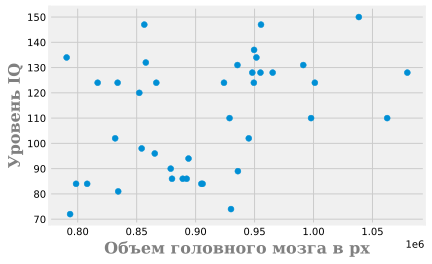

In [161]:
plot(df['MRICount'], df['PIQ'])

In [27]:
df_male = df.loc[(df['Gender'] == 'Male'), ['MRICount', 'PIQ']]
df_male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   MRICount  20 non-null     int64
 1   PIQ       20 non-null     int64
dtypes: int64(2)
memory usage: 480.0 bytes


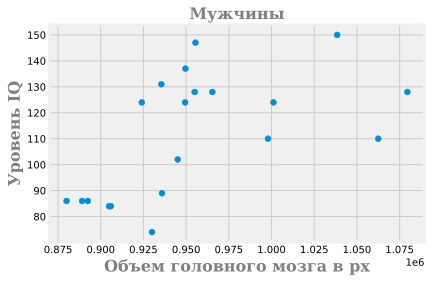

In [163]:
plot(df_male['MRICount'], df_male['PIQ'], 'Мужчины')

In [28]:
df_female = df.loc[(df['Gender'] == 'Female'), ['MRICount', 'PIQ']]
df_female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 37
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   MRICount  20 non-null     int64
 1   PIQ       20 non-null     int64
dtypes: int64(2)
memory usage: 480.0 bytes


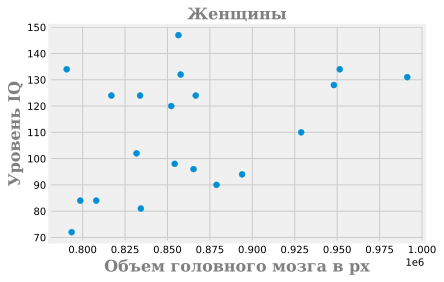

In [165]:
plot(df_female['MRICount'], df_female['PIQ'], 'Женщины')

In [118]:
corr_male = df_male.corr().iloc[0,1]
corr_female = df_female.corr().iloc[0,1]

print(f'Коэффициент корреляции для мужчин: {corr_male}')
print(f'Коэффициент корреляции для женщин: {corr_female}')
print(f'Отношение: {corr_male / corr_female}')

Коэффициент корреляции для мужчин: 0.5682370032144164
Коэффициент корреляции для женщин: 0.39615716686847663
Отношение: 1.4343726448424192


Примечательно, что в выборке по мужчинам коэффициент корреляции признака с целевой переменной почти в 1,5 раза выше, чем в выборке по женщинам.

In [123]:
def b_simulation(value, target):
    b1 = ((value * target).mean() - value.mean() * target.mean()) / ((value ** 2).mean() - (value.mean() ** 2))
    b0 = target.mean() - b1 * value.mean()
    return b0, b1

In [152]:
def b_simulation_2(value, target):    
    X = np.hstack((np.ones((value.shape[0], 1)), value.values.reshape(-1, 1)))
    y = target

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    b = XTX_inv.dot(X.T).dot(y)

    return b

In [170]:
b0, b1 = b_simulation(df['MRICount'], df['PIQ'])
b0, b1

(1.7437570400849012, 0.0001202538010353892)

In [171]:
b0_male, b1_male = b_simulation(df_male['MRICount'], df_male['PIQ'])
b0_male, b1_male

(-116.84399276343333, 0.00023924459427409985)

In [172]:
b0_female, b1_female = b_simulation(df_female['MRICount'], df_female['PIQ'])

b0_female, b1_female

(-23.733467762825555, 0.00015554715382358776)

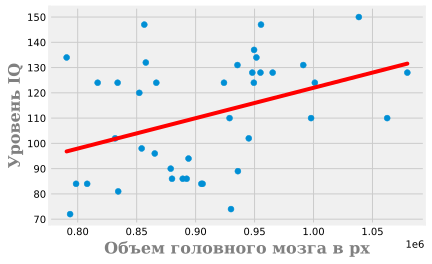

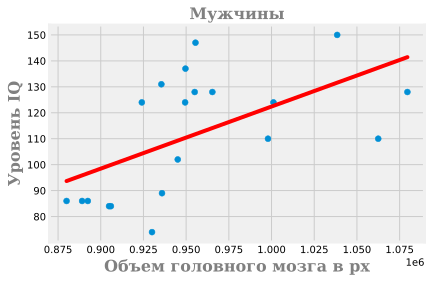

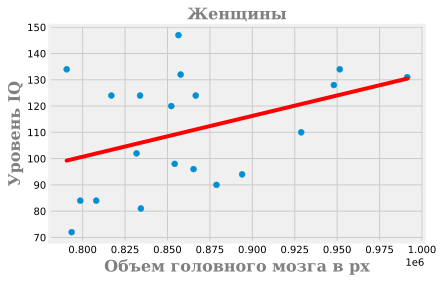

In [173]:
plot(df['MRICount'], df['PIQ'], '', b0, b1)
plot(df_male['MRICount'], df_male['PIQ'], 'Мужчины', b0_male, b1_male)
plot(df_female['MRICount'], df_female['PIQ'], 'Женщины', b0_female, b1_female)

In [206]:
def regression_proof(x, y, a = 0.05):
    R1 = np.corrcoef(x, y)[0,1] ** 2
    print(f'Коэффициент детерминации: {R1}')
    k1 = 1
    k2 = x.shape[0] - k1 -1
    T1 = (R1 / (1 - R1)) * (k2 / k1)
    print(f'F-критерий Фишера: {T1}')
    F_crit = st.f.ppf(1 - a, k1, k2)
    print(f'Значение F_crit: {F_crit}')
    if T1 > F_crit:
        print(f'Уравнение регрессии статистически значимое')
    else:
        print(f'Уравнение регрессии статистически незначимое')

In [207]:
regression_proof(df['MRICount'], df['PIQ'])

Коэффициент детерминации: 0.1496276352027656
F-критерий Фишера: 6.6863063442340875
Значение F_crit: 4.098171730880841
Уравнение регрессии статистически значимое


In [208]:
regression_proof(df_male['MRICount'], df_male['PIQ'])

Коэффициент детерминации: 0.3228932918220999
F-критерий Фишера: 8.583697639679503
Значение F_crit: 4.413873419170566
Уравнение регрессии статистически значимое


In [209]:
regression_proof(df_female['MRICount'], df_female['PIQ'])

Коэффициент детерминации: 0.1569405008612579
F-критерий Фишера: 3.3508062223230395
Значение F_crit: 4.413873419170566
Уравнение регрессии статистически незначимое


**Вывод**
<br>
Между размерами головного мозга и уровнем IQ наблюдается умеренная положительная связь с коэффициентом 0,39, была получена модель линейной регрессии, которая является статистически значимой, но коэффициент деетерминации показывает, что всего 15%  дисперсии переменной PIQ  учитывается или объясняется моделью.
Разделение по гендерному признаку дало интересные результаты:
Так в выборке по мужчинам между размерами головного мозга и уровнем IQ наблюдается уже средняя положительная связь с коэффициентом 0,56, а статистически значимая модель линейной регрессии обладает таким коэффициентом детерминации,что 32%  дисперсии переменной PIQ  учитывается или объясняется моделью.